# Analysis of experiments with protocol "change"
CONTROL(30') - SHOCK(60') - DOTS_TURN(30')

3 patterns, e.g. 'xiv' or 'vxi', shocks are applied in the prefered arm (based on CONTROL session). In the DOTS session the pattern in the previously shocked arm is changed to a different neutral pattern ('dots').

Initial question behind this paradigm was whether fish use pattern-aversion (proximal-cue) or something else. If fish still avoids the arm where the shocks were (= stays in the arms with two previously safe patterns), even though the pattern is gone, it suggests:
* because shock-pattern is gone, it's not direct pattern aversion

If this test works, I would still need to add rotation to it (to prove it's not egocentric)

Speculation then: *it's distant-cue navigation...* (if it works)

In [1]:
import numpy as np
import pandas as pd
from importlib import reload

In [2]:
import anchovy.md as md
import anchovy.analysis as als
import anchovy.classify as cl
import anchovy.plotting as plotting

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

In [4]:
reload(md)
reload(als)
ssa_sub = md.ssa_change.loc[md.xp_new]# & (md.ssa_change.xp_id != '120218-08-01')]
ft = als.fish_types(ssa_sub, center_th=0.6)
over = ft['Overstayer']
ss_sub = ssa_sub.loc[~ssa_sub.xp_id.isin(over)]

ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'

Exception ignored in: 'pandas._libs.lib.is_bool_array'
ValueError: Buffer dtype mismatch, expected 'Python object' but got 'long long'


Unstable: n = 2; Froze: n = 10


In [5]:
reload(als)
disp = lambda x, y: np.sqrt(x ** 2 + y ** 2)
resp = []
ft_all = als.fish_types(md.ssa.loc[md.xp_new], center_th=0.6, arm_th=0.45)
sss = md.ssa.loc[md.xp_new & ~md.ssa.xp_id.isin(ft_all['Overstayer'])]
for g, gg in sss.groupby('xp_id'):
    if gg.shape[0] != 3:
        continue
    co = pd.read_hdf('C:/Users/yashina/projects/fishy_vr/coords/test_{}.h5'.format(gg.iloc[1].ss_id))
    if co.shape[0] < 54000:
        continue
    co = co.iloc[int(co.shape[0]/2):]
    co.x, co.y = co.x.astype(int), co.y.astype(int)
    cat = None
    for k,v in ft.items():
        if g in v:
            cat  = k
    co_disp = disp(co['x'].diff(), co['y'].diff())
    resp.append([g, gg.iloc[0].length, co_disp.sum(), co_disp.mean(), g in froze_in_arm, cat])
resp_df = pd.DataFrame(resp, columns=['xp_id', 'length', 'all_move', 'mean_move', 'manual_froze', 'category'])

Unstable: n = 17; Froze: n = 65


c:\program files\python36\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\program files\python36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


NameError: name 'froze_in_arm' is not defined

In [10]:
co.arm.value_counts().index.values.tolist().remove(3)

In [7]:
resp_df['move_norm'] = resp_df.all_move/resp_df.length

NameError: name 'resp_df' is not defined

In [292]:
crit = resp_df.all_move
th = np.percentile(crit, 10)
th

56576.113371797815

In [8]:
freeze_id_all = resp_df.loc[crit < th, 'xp_id'].values.tolist()
len(freeze_id_all)

NameError: name 'resp_df' is not defined

In [299]:
freeze_id = list(set(freeze_id_all+freeze_id_norm))
freeze_id

['190318-02-01',
 '110118-06-01',
 '240617-01-01',
 '010917-04-01',
 '290917-03-01',
 '170617-02-01',
 '260218-10-01',
 '130817-03-01',
 '200318-02-01',
 '210817-01-01',
 '240118-04-01',
 '011017-06-01',
 '310817-03-01',
 '081017-02-01',
 '250118-06-01',
 '080318-02-01',
 '220617-02-01',
 '250118-02-01',
 '310517-09-01',
 '220318-04-01',
 '160617-02-01',
 '170617-06-01',
 '290118-04-01',
 '080318-04-01',
 '210617-02-01',
 '110118-07-01',
 '130617-07-01',
 '170118-04-01',
 '270817-06-01',
 '290118-02-01',
 '220118-10-01',
 '310817-04-01',
 '150917-04-01',
 '130817-02-01',
 '200318-01-01',
 '120817-04-01',
 '150717-14-01',
 '110917-07-01',
 '170418-02-01',
 '011017-08-01',
 '120418-04-01',
 '210817-04-01',
 '100118-02-01',
 '010917-03-01',
 '230617-03-01',
 '040917-06-01',
 '130218-02-01',
 '070318-01-01',
 '120917-01-01',
 '120418-12-01',
 '260218-06-01',
 '190318-01-01',
 '170617-04-01',
 '240118-07-01',
 '290917-02-01',
 '011017-02-01',
 '240118-10-01',
 '150717-16-01',
 '170617-05-01

In [279]:
[x for x in freeze_id_all if x not in freeze_id_norm]

['010917-03-01',
 '040917-06-01',
 '110917-07-01',
 '120218-08-01',
 '120418-04-01',
 '130817-02-01',
 '150717-14-01',
 '160617-02-01',
 '170617-05-01',
 '210617-02-01',
 '250118-06-01',
 '290118-04-01',
 '310517-09-01',
 '310817-04-01']

In [287]:
[x for x in freeze_id_all if x not in freeze_id_norm]

['010917-04-01',
 '040917-06-01',
 '160617-02-01',
 '220118-10-01',
 '230617-03-01',
 '240118-07-01',
 '240118-10-01',
 '310817-03-01']

In [280]:
[x for x in freeze_id_norm if x not in freeze_id_all]

['011017-06-01',
 '011017-08-01',
 '100118-02-01',
 '120817-04-01',
 '120917-01-01',
 '150917-04-01',
 '160717-05-01',
 '170418-01-01',
 '210817-08-01',
 '240617-01-01',
 '260218-10-01',
 '270817-06-01',
 '290118-02-01',
 '290917-04-01']

In [288]:
[x for x in freeze_id_norm if x not in freeze_id_all]

['011017-08-01',
 '081017-02-01',
 '150717-16-01',
 '170418-02-01',
 '170617-04-01',
 '190318-02-01',
 '220318-04-01',
 '290917-03-01']

In [281]:
[x for x in freeze_id_all if x in freeze_id_norm]

['010917-04-01',
 '010917-06-01',
 '011017-02-01',
 '070318-01-01',
 '080318-02-01',
 '080318-04-01',
 '081017-02-01',
 '110118-06-01',
 '110118-07-01',
 '120418-12-01',
 '130218-02-01',
 '130617-07-01',
 '130817-03-01',
 '150717-16-01',
 '170118-04-01',
 '170418-02-01',
 '170617-02-01',
 '170617-04-01',
 '170617-06-01',
 '190318-01-01',
 '190318-02-01',
 '200318-01-01',
 '200318-02-01',
 '210817-01-01',
 '210817-04-01',
 '220118-10-01',
 '220318-04-01',
 '220617-02-01',
 '230617-03-01',
 '240118-02-01',
 '240118-04-01',
 '240118-07-01',
 '240118-10-01',
 '250118-02-01',
 '260218-06-01',
 '290917-02-01',
 '290917-03-01',
 '310817-03-01']

In [289]:
[x for x in freeze_id_all if x in freeze_id_norm]

['010917-06-01',
 '080318-02-01',
 '080318-04-01',
 '110118-06-01',
 '110118-07-01',
 '130218-02-01',
 '130617-07-01',
 '170118-04-01',
 '170617-02-01',
 '170617-06-01',
 '190318-01-01',
 '200318-01-01',
 '200318-02-01',
 '210817-01-01',
 '210817-04-01',
 '220617-02-01',
 '240118-04-01',
 '250118-02-01']

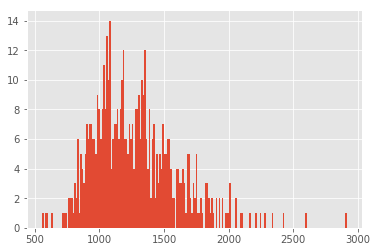

In [274]:
crit.hist(bins=200)

plt.show()

In [250]:
resp_df.loc[resp_df.xp_id.isin(freeze_id)]

xp_id     length      all_move  mean_move  manual_froze category  \
13   010917-03-01  59.500000  55912.883151   0.517717         False     None   
14   010917-04-01  57.700000  50775.318899   0.470146         False     None   
16   010917-06-01  52.100000  42764.348329   0.395970         False     None   
17   011017-02-01  58.900000  53644.487317   0.496713         False     None   
39   040917-06-01  54.200000  49856.614417   0.461640         False     None   
71   070318-01-01  57.582076  52476.078089   0.485894         False     None   
85   080318-02-01  61.099745  36116.274619   0.334413         False     None   
86   080318-04-01  59.913150  48323.349582   0.447443         False     None   
101  081017-02-01  65.656727  53853.836443   0.498651         False     None   
121  110118-06-01  65.822787  36686.394704   0.334120         False     None   
122  110118-07-01  60.843794  47051.373775   0.428519         False     None   
133  110917-07-01  58.400000  56226.186878   0.520618         False     None   
137  120218-08-01  54.895175  53936.668948   0.491226          True  One arm   
144  120418-04-01  58.676834  54852.376631   0.503626         False     None   
149  120418-12-01  63.399215  54538.112831   0.496704         False     None   
161  130218-02-01  61.264256  50969.727325   0.464205          True  One arm   
166  130617-07-01  53.300000  38587.597876   0.357296         False     None   
167  130817-02-01  54.600000  54973.933384   0.509023         False     None   
168  130817-03-01  63.000000  56200.513523   0.520380         False     None   
202  150717-14-01  59.900000  56134.024175   0.519764         False     None   
203  150717-16-01  65.000000  52265.368065   0.483943         False     None   
215  160617-02-01  53.500000  49618.801142   0.574298         False     None   
243  170118-04-01  59.069208  45496.874127   0.421271         False     None   
249  170418-02-01  62.740559  52364.628242   0.482263         False     None   
255  170617-02-01  57.100000  42204.866594   0.390789         False     None   
257  170617-04-01  65.600000  53140.969393   0.492051         False     None   
258  170617-05-01  58.500000  56559.141327   0.523701         False     None   
259  170617-06-01  59.300000  35519.943972   0.328891         False     None   
270  190318-01-01  54.742217  39355.024190   0.358425         False     None   
271  190318-02-01  61.523072  51646.121274   0.478209         False     None   
284  200318-01-01  58.572521  48909.942880   0.445446         False     None   
285  200318-02-01  58.351742  44281.865718   0.410021         False     None   
301  210617-02-01  59.000000  55335.023558   0.512366         False     None   
302  210817-01-01  60.600000  46503.190624   0.430589         False     None   
304  210817-04-01  56.600000  47081.747647   0.435946         False     None   
313  220118-10-01  58.887887  50546.544404   0.468028         False   Center   
319  220318-04-01  68.061585  53392.351089   0.494378         False     None   
320  220617-02-01  55.900000  46627.476051   0.431740         False     None   
348  230617-03-01  56.600000  49907.091295   0.462107         False     None   
356  240118-02-01  64.343062  55110.788754   0.506594         False  One arm   
358  240118-04-01  58.482787  37293.006858   0.339645          True  One arm   
359  240118-07-01  58.811110  50876.984201   0.471088         False   Center   
362  240118-10-01  55.220683  48230.606882   0.446584         False  One arm   
379  250118-02-01  61.249843  48524.066600   0.441931          True  One arm   
381  250118-06-01  57.890965  55045.595447   0.509686         False  One arm   
400  260218-06-01  60.318491  54872.484697   0.499749         False     None   
452  290118-04-01  54.762997  51281.143203   0.467041         False  One arm   
462  290917-02-01  65.500000  56441.188498   0.522608         False     None   
463  290917-03-01  66.400000  56107.991603   0.519523         False     None   
506  310517-

In [208]:
md.ssa.loc[md.ssa.xp_id.isin(freeze_id)]

cross_date      sj_id                                       env_geometry  \
646  2017-06-13  130617-07  [[[220.37828064, 469.898803711], [5.9810867309...   
727  2017-06-17  170617-02  [[[393.573944092, 485.554534912], [286.3100280...   
733  2017-06-17  170617-04  [[[394.75213623, 487.11517334], [287.133026123...   
739  2017-06-17  170617-06  [[[393.346038818, 486.651855469], [285.9045410...   
817  2017-06-22  220617-02  [[[394.524230957, 488.212493896], [286.7275390...   
844  2017-06-23  230617-03  [[[224.978286743, 483.582244873], [3.339632034...   
862  2017-06-24  240617-01  [[[217.812561035, 468.102722168], [3.317359924...   
1102 2017-07-16  160717-05  [[[217.126815796, 467.814666748], [2.276500701...   
1123 2017-07-15  150717-16  [[[391.859558105, 488.342285156], [281.0037231...   
1549 2017-08-12  120817-04  [[[421.632446289, 521.081665039], [306.6911621...   
1558 2017-08-13  130817-03  [[[533.660400391, 364.778625488], [648.2191772...   
1720 2017-08-21  210817-01  [[[517.584350586, 352.836975098], [628.6049804...   
1729 2017-08-21  210817-04  [[[405.063781738, 505.658081055], [290.5141296...   
1741 2017-08-21  210817-08  [[[408.04864502, 504.374267578], [296.84359741...   
1849 2017-08-27  270817-06  [[[360.287567139, 445.433776855], [262.0943298...   
1912 2017-08-31  310817-03  [[[224.724411011, 478.683197021], [6.504581451...   
1939 2017-09-01  010917-04  [[[388.35446167, 483.651306152], [278.59616088...   
1945 2017-09-01  010917-06  [[[388.35446167, 483.651306152], [278.59616088...   
2038 2017-09-12  120917-01  [[[533.153930664, 363.446289063], [647.5214233...   
2065 2017-09-15  150917-04  [[[415.973754883, 519.248352051], [298.3635253...   
2183 2017-09-29  290917-02  [[[391.21762085, 482.433258057], [284.66403198...   
2186 2017-09-29  290917-03  [[[192.316757202, 409.698486328], [5.483753204...   
2189 2017-09-29  290917-04  [[[391.21762085, 482.433258057], [284.66403198...   
2207 2017-10-01  011017-02  [[[394.059051514, 481.165435791], [290.7426757...   
2219 2017-10-01  011017-06  [[[394.059051514, 481.165435791], [290.7426757...   
2225 2017-10-01  011017-08  [[[394.059051514, 481.165435791], [290.7426757...   
2231 2017-10-08  081017-02  [[[392.644775391, 480.691833496], [289.5005798...   
2267 2018-01-10  100118-02  [[[399.153259277, 498.369384766], [286.1232910...   
2285 2018-01-11  110118-06  [[[386.682922363, 478.751342773], [281.1949462...   
2288 2018-01-11  110118-07  [[[230.735076904, 495.812957764], [3.564670562...   
2339 2018-01-17  170118-04  [[[390.268859863, 477.576904297], [287.8134155...   
2387 2018-01-22  220118-10  [[[384.619537354, 480.071075439], [275.7759094...   
2399 2018-01-24  240118-02  [[[342.842498779, 424.541442871], [249.2119750...   
2405 2018-01-24  240118-04  [[[388.633300781, 480.409301758], [282.6124877...   
2420 2018-01-24  240118-07  [[[533.153930664, 363.446289063], [647.5214233...   
2435 2018-01-24  240118-10  [[[358.168701172, 442.342468262], [260.6311950...   
2441 2018-01-25  250118-02  [[[390.683105469, 479.050598145], [288.0555114...   
2465 2018-01-29  290118-02  [[[384.619537354, 480.071075439], [275.7759094...   
2555 2018-02-13  130218-02  [[[341.009216309, 425.714294434], [244.4008178...   
2615 2018-02-26  260218-06  [[[384.619537354, 480.071075439], [275.7759094...   
2663 2018-02-26  260218-10  [[[387.455078125, 478.848632813], [281.7894287...   
2741 2018-03-08  080318-02  [[[400.580932617, 498.826507568], [287.3610229...   
2747 2018-03-08  080318-04  [[[387.86114502, 480.311981201], [282.01794433...   
2756 2018-03-07  070318-01  [[[505.426757813, 348.797332764], [610.7498779...   
2774 2018-03-19  190318-01  [[[504.308685303, 345.288818359], [612.7474365...   
2777 2018-03-19  190318-02  [[[419.939483643, 512.898712158], [309.7882995...   
2780 2018-03-20  200318-01  [[[509.145874023, 350.610473633], [615.0054321...   
2783 2018-03-20  200318-02  [[[359.050842285, 440.087524414], [264.6355590...   
2825 2018-03-22  220318-04  [[[387.4

In [131]:
resp_df.loc[~resp_df.category.isna()].sort_values('all_move')

xp_id     length       all_move  mean_move  manual_froze  \
358  240118-04-01  58.482787   37293.006858   0.339645          True   
362  240118-10-01  55.220683   48230.606882   0.446584         False   
379  250118-02-01  61.249843   48524.066600   0.441931          True   
313  220118-10-01  58.887887   50546.544404   0.468028         False   
359  240118-07-01  58.811110   50876.984201   0.471088         False   
161  130218-02-01  61.264256   50969.727325   0.464205          True   
452  290118-04-01  54.762997   51281.143203   0.467041         False   
137  120218-08-01  54.895175   53936.668948   0.491226          True   
381  250118-06-01  57.890965   55045.595447   0.509686         False   
356  240118-02-01  64.343062   55110.788754   0.506594         False   
451  290118-02-01  63.262477   56722.849386   0.516602         False   
469  300118-02-01  58.017099   57052.553708   0.519604         False   
312  220118-09-01  60.036576   59469.036290   0.550644         False   
140  120218-11-01  60.072998   59661.995211   0.543370         False   
360  240118-08-01  53.764441   60854.764087   0.560589         False   
382  250118-08-01  49.427145   61179.894144   0.564718         False   
470  300118-03-01  59.434312   61385.768655   0.568392         False   
135  120218-02-01  60.893689   64326.493889   0.595621         False   
69   070218-07-01  64.637432   64395.147848   0.586477         False   
70   070218-08-01  67.959545   64494.324434   0.596882         False   
310  220118-07-01  62.970245   64654.622576   0.593243         False   
160  130218-01-01  56.485877   65214.983595   0.603703         False   
361  240118-09-01  57.486002   66341.229750   0.613589         False   
141  120218-12-01  62.506955   67171.772581   0.614963         False   
314  220118-11-01  52.626348   70767.405122   0.654769         False   
498  310118-01-01  56.363959   71216.896237   0.648606          True   
311  220118-08-01  55.966953   71610.192657   0.660075         False   
163  130218-04-01  58.003524   72243.965347   0.668932         False   
454  290118-06-01  51.994265   73473.030790   0.679105         False   
136  120218-06-01  59.404004   74977.336589   0.691277         False   
345  230118-01-01  58.640829   75048.230523   0.683499         False   
68   070218-06-01  63.758465   84229.580288   0.778412         False   
64   070218-01-01  58.018577   85003.648605   0.785986         False   
67   070218-04-01  67.493218   87111.445105   0.805156         False   
355  240118-01-01  70.841560   89068.291951   0.822756         False   
453  290118-05-01  56.836967   89185.774496   0.824824         False   
139  120218-10-01  69.521652   89961.734367   0.832424         False   
134  120218-01-01  63.081448   90023.765702   0.833322         False   
66   070218-03-01  68.594487   90349.011389   0.834263         False   
65   070218-02-01  60.432203   92925.488935   0.858339         False   
380  250118-04-01  51.619710   94820.698295   0.877433         False   
162  130218-03-01  57.577237  101087.601015   0.936005         False   
316  220118-14-01  59.720650  107763.350420   0.995376         False   
315  220118-13-01  57.205539  107978.402364   0.997390         False   
357  240118-03-01  70.081424  119782.648089   1.102666         False   
471  300118-04-01  54.473424  141502.174344   1.299640         False   

          category    move_norm  
358        One arm   637.674922  
362        One arm   873.415623  
379        One arm   792.231684  
313         Center   858.352147  
359         Center   865.091379  
161        One arm   831.965170  
452        One arm   936.419598  
137        One arm   982.539347  
381        One arm   950.849511  
356        One arm   856.514864  
451        One arm   896.627063  
469        One arm   983.374813  
312         Center   990.546775  
140        One arm   993.158276  
360        One arm  1131.877564  
382  Non-responder  1237.779246  
470         Center  1032.833843  
135        One 

In [9]:
ft

{'Center': ['220118-09-01', '300118-03-01', '070218-08-01', '130218-04-01'],
 'Non-responder': ['220118-08-01',
  '220118-11-01',
  '240118-03-01',
  '220118-13-01',
  '220118-14-01',
  '250118-04-01',
  '250118-08-01',
  '290118-05-01',
  '300118-04-01',
  '070218-06-01',
  '120218-06-01',
  '130218-03-01'],
 'One arm': ['220118-07-01',
  '240118-08-01',
  '230118-01-01',
  '250118-06-01',
  '300118-02-01',
  '310118-01-01',
  '070218-07-01',
  '120218-01-01',
  '120218-02-01',
  '120218-11-01',
  '120218-12-01'],
 'Overstayer': ['220118-12-01',
  '240118-05-01',
  '240118-06-01',
  '230118-02-01',
  '250118-01-01',
  '250118-03-01',
  '250118-05-01',
  '250118-07-01',
  '290118-01-01',
  '290118-03-01',
  '300118-01-01',
  '310118-02-01',
  '070218-05-01',
  '070218-09-01',
  '070218-10-01',
  '120218-03-01',
  '120218-04-01',
  '120218-05-01',
  '120218-07-01',
  '130218-05-01',
  '130218-06-01'],
 'Two arms': ['240118-01-01',
  '240118-09-01',
  '290118-06-01',
  '070218-01-01',
  

In [11]:
reload(als)
disp = lambda x, y: np.sqrt(x ** 2 + y ** 2)
resp = []
ft_old = als.fish_types(md.ssa.loc[md.ssa.xp_type == 'training'])
ss_old = md.ssa.loc[(md.ssa.xp_type == 'training') & ~md.ssa.xp_id.isin(ft_old['Overstayer'])]
for g, gg in ss_old.groupby('xp_id'):
    co = pd.read_hdf(gg.iloc[1].ss_coords_path)
    co = co.iloc[int(co.shape[0]/2):]
    cat = None
    for k,v in ft.items():
        if g in v:
            cat  = k
    co_disp = disp(co['x'].diff(), co['y'].diff())
    resp.append([g, gg.iloc[0].length, co_disp.sum(), co_disp.mean(), g in froze_in_arm, cat])
resp_df_old = pd.DataFrame(resp, columns=['xp_id', 'length', 'all_move', 'mean_move', 'manual_froze', 'category'])

Unstable: n = 1; Froze: n = 0


NameError: name 'froze_in_arm' is not defined

In [316]:
resp_df_old['move_norm'] = resp_df.all_move/resp_df.length

In [317]:
resp_df_old

xp_id  length       all_move  mean_move  manual_froze category  \
0   011115-02-08    29.5   80259.851562   0.815525         False     None   
1   011115-03-08    27.5   69170.843750   0.717265         False     None   
2   131015-03-19    64.5  132251.703125   1.225063         False     None   
3   131015-05-19    59.0  141132.234375   1.309739         False     None   
4   131015-06-19    75.0  104294.820312   1.217572         False     None   
5   141015-01-15    31.0   44378.703125   0.513636         False     None   
6   141015-07-19    52.5   83472.742188   0.954814         False     None   
7   141015-10-19    45.5   70428.609375   0.684877         False     None   
8   141015-11-19    58.5  129221.890625   1.196532         False     None   
9   141015-16-08    29.0   47743.449219   0.621287         False     None   
10  151015-01-16    43.5   91478.273438   0.866075         False     None   
11  151015-04-16    37.0   86607.398438   0.834979         False     None   
12  151015-05-19   115.5  179164.062500   1.658973         False     None   
13  151015-09-08    32.0   66171.250000   0.624345         False     None   
14  151015-10-08    35.0   96567.343750   0.900823         False     None   
15  191015-01-22   133.5  194389.171875   1.799983         False     None   
16  191015-02-22   130.5  191621.062500   1.929699         False     None   
17  191015-03-22   123.0  247076.750000   2.287960         False     None   
18  191015-05-08    30.5   62656.558594   0.652870         False     None   
19  191015-06-08    30.0   50519.671875   0.609545         False     None   
20  191015-08-08    27.5   61844.277344   0.677426         False     None   
21  191015-09-08    27.0   66259.460938   0.701292         False     None   
22  191015-10-08    31.0   38670.910156   0.635449         False     None   
23  201015-02-22    46.5  134449.968750   1.316472         False     None   
24  201015-06-08    30.5  116465.046875   1.089976         False     None   
25  201015-07-08    30.0   98091.765625   0.908871         False     None   
26  201015-09-08    34.5   78775.867188   0.743863         False     None   
27  201015-10-08    29.0   96031.632812   0.889346         False     None   
28  280915-02-14    56.0  124424.445312   1.152196         False     None   
29  280915-03-14    55.5   51476.781250   0.923582         False     None   
30  280915-04-15    78.5  144443.031250   1.337497         False     None   
31  280915-05-15    60.0  107334.250000   0.995024         False     None   
32  280915-06-15    62.0  114599.585938   1.103670         False     None   
33  280915-07-15    80.0  148304.750000   1.373256         False     None   
34  280915-08-15    68.0  127911.125000   1.184384         False     None   
35  300815-02-23    49.5   84648.125000   1.067617         False     None   
36  300815-03-23    43.0  107880.671875   0.998914         False     None   
37  310815-01-21    56.0   95129.179688   0.881593         False     None   
38  310815-02-21    72.5   97966.359375   1.302761         False     None   
39  310815-03-21    51.0  106649.093750   1.026173         False     None   
40  310815-04-21    94.5  162257.156250   1.502451         False     None   
41  310815-05-22    63.5  149569.125000   1.385117         False     None   
42  310815-07-22    46.0  212101.281250   1.963955         False     None   
43  310815-09-23   100.5  132591.859375   1.227782         False     None   
44  310815-10-23    93.0  147567.734375   1.395347         False     None   
45  310815-12-23   122.0  212380.609375   1.966542         False     None   
46  310815-13-23    83.0  153305.781250   1.419551         False     None   

      move_norm  
0   1276.436820  
1   1290.184012  
2   1125.100053  
3   1289.949211  
4   1088.960009  
5   1300.229884  
6   1511.982654  
7   1351.923350  
8   2059.071896  
9   1497.753170  
10  1932.701859  
11  2009.764827  
12  1387.865010  
13   939.712322  
14   879.988196  
15  1171.390515  
16   820

In [318]:
reload(analysis)
avg_e, avg_sum_e = analysis.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], analysis.entry, flip_patt=True)
avg_o, avg_sum_o = analysis.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], analysis.occupancy, flip_patt=True, val=[0,1,2,3])

8.0
8.0


In [319]:
ax = plt.subplot('111')
ind = 0
ind_1 = (avg_o[0].iloc[90] < 1).values
for i in range(8):
    if (avg_o[ind].iloc[79][ind_1][i] - avg_o[ind].iloc[90][ind_1][i]) < -0.2:
        col = 'r'
    else:
        col = 'k'
    ax.plot([1, 2], [avg_e[ind].iloc[79][ind_1][i], avg_e[ind].iloc[90][ind_1][i]], c=col, alpha=0.5)
    ax.plot([3, 4], [avg_o[ind].iloc[79][ind_1][i], avg_o[ind].iloc[90][ind_1][i]], c=col, alpha=0.5)

ax.set_xlim(0, 5)

(0, 5)

In [321]:
import seaborn as sns

In [323]:
ind = 0
#sns.swarmplot(avg_e[ind].iloc[79][ind_1] - avg_e[ind].iloc[90][ind_1])
plt.ylim(-0.3, 0.3)
plt.xlim(-0.1, 0.1)
plt.plot([-0.1, 0.1], [0.2, 0.2], 'k--')
plt.plot([-0.1, 0.1], [-0.2, -0.2], 'k--')
sns.swarmplot(y=avg_o[ind].iloc[79][ind_1] - avg_o[ind].iloc[90][ind_1])

In [259]:
print("{} fish in the selection after {} overstayers exluded".format(int(ss_sub.shape[0]/3), len(over)))

46 fish in the selection after 21 overstayers exluded


In [ ]:
ss_sub.loc[0::3].stim_at.value_counts()

In [196]:
center = ft['Center']
len(center)

6

In [197]:
ss_sub = ss_sub.loc[~ss_sub.xp_id.isin(center)]
print("{} fish in the selection after {} overcentrals were exluded".format(int(ss_sub.shape[0]/3), len(center)))

40 fish in the selection after 6 overcentrals were exluded


In [ ]:
import anchovy.maze_utils as mu

In [ ]:
co = pd.read_hdf(ss_sub.loc[ss_sub.ss_id == '240118-01-01-02'].ss_coords_path.values[0])
co.arm.value_counts()

In [ ]:
mu.relative(np.array([0]), 1, 3)

In [ ]:
ss_sub.loc[0::3, ['xp_id', 'env_patterns', 'stim_at']]

___

Analyse the stability of response in the end of Conditioning

In [180]:
sd = avg_o[0][70:80].std(0)
mn = avg_o[0][70:80].mean(0)
(mn[(abs(avg_o[0].iloc[80] - mn)) > 0.1]).index.values

array(['070218-02-01', '070218-03-01'], dtype=object)

In [192]:
unstable = ['070218-02-01', '070218-03-01', '110917-02-01', '120418-13-01',
       '140817-01-01', '160817-05-01', '160817-08-01', '200617-01-01',
       '220617-05-01', '220817-04-01', '230817-06-01', '240517-04-01',
       '250617-08-01', '270817-02-01', '290318-07-01', '290517-02-01',
       '290517-07-01', '300517-01-01', '300517-10-01']

In [70]:
reload(als)
avg_e, avg_sum_e = als.avg_sliding(ss_sub, als.entry, **{'val': [0,1,2], 'abs_num':True})
# avg_o, avg_sum_o = als.avg_sliding(ss_sub, als.occupancy, **{'val': [0,1,2,3]})

Unstable: n = 2; Froze: n = 11
46.0
070218-01-01
070218-02-01
070218-03-01
070218-04-01
070218-06-01
070218-07-01
070218-08-01
120218-01-01
120218-02-01
120218-06-01
120218-08-01
120218-10-01
120218-11-01
120218-12-01
130218-01-01
130218-02-01
130218-03-01
130218-04-01
220118-07-01
220118-08-01
220118-09-01
220118-10-01
220118-11-01
220118-13-01
220118-14-01
230118-01-01
240118-01-01
240118-02-01
240118-03-01
240118-04-01
240118-07-01
240118-08-01
240118-09-01
240118-10-01
250118-02-01
250118-04-01
250118-06-01
250118-08-01
290118-02-01
290118-04-01
290118-05-01
290118-06-01
300118-02-01
300118-03-01
300118-04-01
310118-01-01


In [78]:
avg_e1, avg_sum_e1 = als.avg_sliding(md.ssa.loc[md.ssa.xp_id == '130817-05-01'], als.entry, **{'val': [0,1,2], 'abs_num':False})

Unstable: n = 0; Froze: n = 0
1.0
130817-05-01


In [79]:
avg_sum_e1.iloc[79]

130817-05-01    2
Name: 79, dtype: int64

In [74]:
no_entries = avg_sum_e.columns[avg_sum_e.iloc[80] <= 5]

In [75]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(no_entries)], als.entry,
                      excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

Unstable: n = 0; Froze: n = 4
8.0
130218-02-01
220118-09-01
220118-10-01
230118-01-01
240118-07-01
250118-02-01
300118-02-01
310118-01-01
6.137222222222222


Unstable: n = 0; Froze: n = 4
8.0
130218-02-01
220118-09-01
220118-10-01
230118-01-01
240118-07-01
250118-02-01
300118-02-01
310118-01-01
6.137222222222222


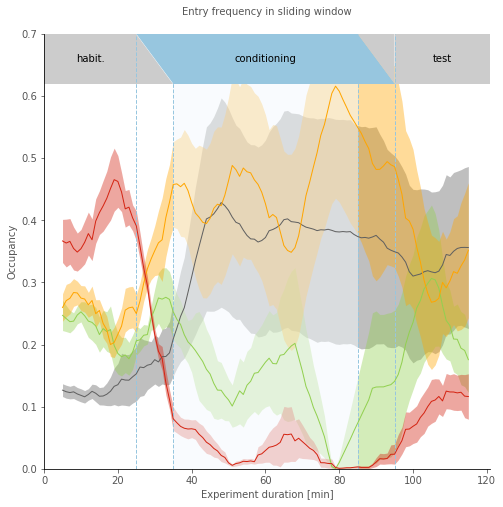

In [76]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(no_entries)], als.occupancy,
                      excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2,3]})

Unstable: n = 0; Froze: n = 0
14.0
070218-01-01
070218-04-01
070218-07-01
120218-01-01
120218-02-01
120218-10-01
120218-11-01
120218-12-01
130218-01-01
220118-07-01
240118-01-01
240118-08-01
240118-09-01
290118-06-01
6.137222222222222


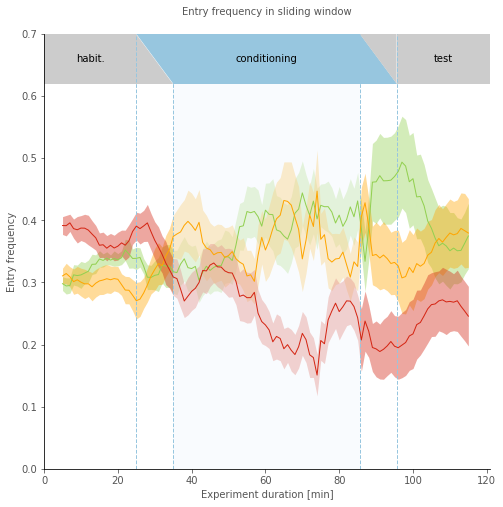

In [80]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(no_entries) & 
                                ss_sub.xp_id.isin(ft['One arm']+ft['Two arms'])], als.entry,
                      excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

In [82]:
avg_sum_e.iloc[80]

070218-01-01     28.0
070218-02-01     46.0
070218-03-01     22.0
070218-04-01     45.0
070218-06-01     32.0
070218-07-01     21.0
070218-08-01     10.0
120218-01-01     19.0
120218-02-01     19.0
120218-06-01     32.0
120218-08-01    224.0
120218-10-01     41.0
120218-11-01     18.0
120218-12-01     10.0
130218-01-01     42.0
130218-02-01      3.0
130218-03-01     61.0
130218-04-01     37.0
220118-07-01     12.0
220118-08-01     20.0
220118-09-01      0.0
220118-10-01      1.0
220118-11-01     16.0
220118-13-01     52.0
220118-14-01     49.0
230118-01-01      1.0
240118-01-01     46.0
240118-02-01     15.0
240118-03-01     71.0
240118-04-01     20.0
240118-07-01      5.0
240118-08-01     10.0
240118-09-01     45.0
240118-10-01     10.0
250118-02-01      0.0
250118-04-01     58.0
250118-06-01     14.0
250118-08-01     22.0
290118-02-01     20.0
290118-04-01     10.0
290118-05-01     41.0
290118-06-01     33.0
300118-02-01      4.0
300118-03-01     20.0
300118-04-01     82.0
310118-01-

___

In [ ]:
avg_array_e = []
avg_array_o = []
for a_e, a_o in zip(avg_e, avg_o):
    avg_array_e.append(a_e.values)
    avg_array_o.append(a_o.values)
avg_array_e = np.array(avg_array_e)
avg_array_o = np.array(avg_array_o)
np.nanmean(avg_array_e.swapaxes(0, 1)[55], 1)

In [ ]:
sign_e = []
for tp in avg_array_e.swapaxes(0, 1):
    sign_e.append(analysis.permute(tp, n=100000))

In [ ]:
np.array(sign_e)

In [ ]:
sign_o = []
for tp in avg_array_o.swapaxes(0, 1):
    sign_o.append(analysis.permute(tp, n=100000))

In [ ]:
np.array(sign_o)

In [199]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(unstable)], analysis.entry,
                      excl=True, avg=avg_e, avg_sum=avg_sum_e, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

6.13722222222


6.13722222222


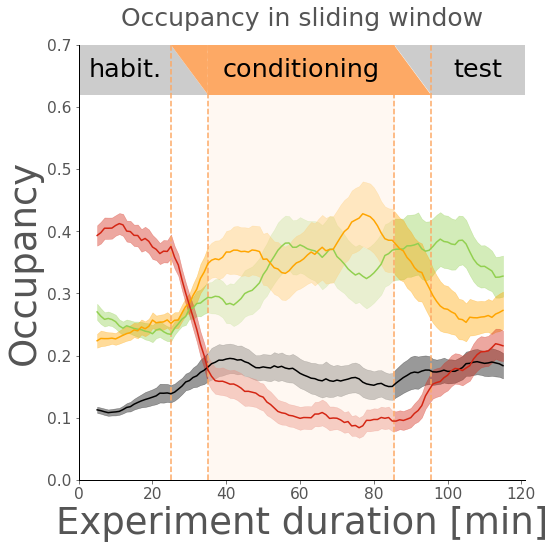

In [200]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(unstable)], analysis.occupancy,
                      excl=True, avg=avg_o, avg_sum=avg_sum_o, #individ=True,
                      name='Occupancy in sliding window',# show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
reload(plotting)
plotting.plot_windows(ss_sub, func=analysis.occupancy, sgf=(np.array(sign_o)[80], np.array(sign_o)[91]))
plotting.plot_windows(ss_sub, func=analysis.entry, sgf=(np.array(sign_e)[80], np.array(sign_e)[91]))

In [8]:
no_reaction = ['220118-08-01', '220118-11-01', '220118-13-01', '220118-14-01', '240118-03-01',
               '250118-04-01', '290118-05-01', '300118-04-01', '310118-02-01', '070218-06-01',
               '120218-09-01', '130218-03-01']
froze_in_arm = ['240118-04-01', '250118-02-01', '310118-01-01', '120218-08-01', '120218-08-11',
                '130218-02-01']

In [ ]:
ss_sub_ = ss_sub.loc[~ss_sub.xp_id.isin(froze_in_arm+no_reaction)]
ss_sub_.shape[0]/3

In [ ]:
plotting.plot_windows(ss_sub_, func=analysis.occupancy, two_one=False)
plotting.plot_windows(ss_sub_, func=analysis.entry, two_one=False)

___

In [ ]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(ft['Non-responder'])], analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

In [ ]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(ft['Non-responder'])], analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

___

In [137]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Center']) & ~ss_sub.xp_id.isin(freeze_id)], analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

6.0
6.13722222222


In [138]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Center']) & ~ss_sub.xp_id.isin(freeze_id)], analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

6.0
6.13722222222


In [101]:
ss_sub[ss_sub.xp_id.isin(ft['One arm']) & ~ss_sub.xp_id.isin(freeze_id)].xp_id[::3]

2378    220118-07-01
2423    240118-08-01
2426    230118-01-01
2453    250118-06-01
2471    290118-04-01
2483    300118-02-01
2492    310118-01-01
2516    070218-07-01
2528    120218-01-01
2531    120218-02-01
2549    120218-08-01
2576    120218-11-01
2579    120218-12-01
Name: xp_id, dtype: object

In [104]:
ss_sub[ss_sub.xp_id.isin(ft['One arm']) & ~ss_sub.xp_id.isin(freeze_id)].xp_id[::3]

2378    220118-07-01
2423    240118-08-01
2426    230118-01-01
2492    310118-01-01
2516    070218-07-01
2528    120218-01-01
2531    120218-02-01
2576    120218-11-01
2579    120218-12-01
Name: xp_id, dtype: object

___

In [304]:
avg_e, avg_sum_e = als.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])], als.entry,
                                   exclude_overstayers=False)
avg_o, avg_sum_o = als.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])], als.occupancy,
                                   exclude_overstayers=False,
                                   **{'val': [0, 1, 2, 3]})

10.0
10.0


In [305]:
avg_array_e = []
avg_array_o = []
for a_e, a_o in zip(avg_e, avg_o):
    avg_array_e.append(a_e.values)
    avg_array_o.append(a_o.values)
avg_array_e = np.array(avg_array_e)
avg_array_o = np.array(avg_array_o)

sign_e = []
e_swap = avg_array_e.swapaxes(0, 1)
pts = [19, 79, 90]
for tp in e_swap[pts]:
    sign_e.append(als.permute(tp, n=1000000))
sign_o = []
o_swap = avg_array_o.swapaxes(0, 1)

for tp in o_swap[pts]:
    sign_o.append(als.permute(tp, n=1000000))

sign_e, sign_o

([0.72431999999999996, 0.105369, 0.168711],
 [0.98833300000000002, 6.2000000000000003e-05, 0.021866])

In [301]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])],
                      analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

10.0
6.13722222222


In [302]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['One arm'])], analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

10.0
6.13722222222


___

In [303]:
avg_e, avg_sum_e = als.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], als.entry,
                                   exclude_overstayers=False)
avg_o, avg_sum_o = als.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], als.occupancy,
                                   exclude_overstayers=False,
                                   **{'val': [0, 1, 2, 3]})

8.0
8.0


In [263]:
avg_array_e = []
avg_array_o = []
for a_e, a_o in zip(avg_e, avg_o):
    avg_array_e.append(a_e.values)
    avg_array_o.append(a_o.values)
avg_array_e = np.array(avg_array_e)
avg_array_o = np.array(avg_array_o)

sign_e = []
e_swap = avg_array_e.swapaxes(0, 1)
pts = [19, 79, 90]
for tp in e_swap[pts]:
    sign_e.append(als.permute(tp, n=1000000))
sign_o = []
o_swap = avg_array_o.swapaxes(0, 1)

for tp in o_swap[pts]:
    sign_o.append(als.permute(tp, n=1000000))

sign_e, sign_o

([0.98117100000000002, 0.0041939999999999998, 0.019791],
 [0.98900900000000003, 6.0000000000000002e-06, 0.001263])

In [157]:
ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])].loc[:, ['xp_id', 'stim_at', 'env_patterns']][::3]

xp_id stim_at env_patterns
2396  240118-01-01       0          vix
2432  240118-09-01       0          ixv
2474  290118-05-01       2          ixv
2477  290118-06-01       2          ixv
2498  070218-01-01       1          vix
2501  070218-02-01       2          vix
2504  070218-03-01       1          xvi
2507  070218-04-01       0          xvi
2543  120218-06-01       2          ivx
2552  130218-01-01       0          vxi
2561  120218-10-01       0          ivx
2564  130218-03-01       1          ivx

8.0
6.13722222222


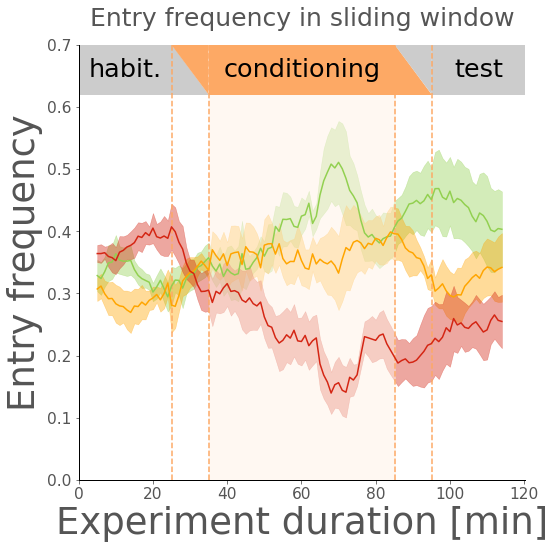

In [264]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], analysis.entry, excl=True, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

8.0
6.13722222222


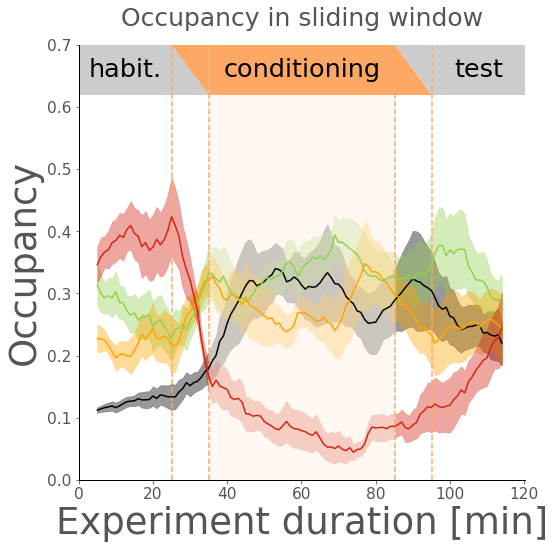

In [265]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(ft['Two arms'])], analysis.occupancy, excl=True, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

___

In [ ]:
avg_e_, avg_sum_e_ = analysis.avg_sliding(ss_sub_, analysis.entry, **{'val': [0,1,2]})
avg_o_, avg_sum_o_ = analysis.avg_sliding(ss_sub_, analysis.occupancy, **{'val': [0,1,2,3]})

In [ ]:
ss_sub_.iloc[[0,1,2]]

In [ ]:
avg_e_0, avg_sum_e_0 = analysis.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(left_maze)], analysis.entry, **{'val': [0,1,2]})
avg_o_0, avg_sum_o_0 = analysis.avg_sliding(ss_sub.loc[ss_sub.xp_id.isin(left_maze)], analysis.occupancy, **{'val': [0,1,2,3]})

In [ ]:
avg_e_1, avg_sum_e_1 = analysis.avg_sliding(ss_sub.loc[~ss_sub.xp_id.isin(left_maze)], analysis.entry, **{'val': [0,1,2]})
avg_o_1, avg_sum_o_1 = analysis.avg_sliding(ss_sub.loc[~ss_sub.xp_id.isin(left_maze)], analysis.occupancy, **{'val': [0,1,2,3]})

In [ ]:
plotting.plot_sliding(ss_sub_, analysis.entry,
                      excl=True, avg=avg_e_, avg_sum=avg_sum_e_, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

In [ ]:
plotting.plot_sliding(ss_sub_, analysis.occupancy, 
                      excl=True, avg=avg_o_, avg_sum=avg_sum_o_, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
left_maze = []
for g, gg in ss_sub.groupby('xp_id'):
    if int(g[-5:-3])%2 == 1:
        left_maze.append(g)
left_maze

In [ ]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(left_maze)], analysis.entry,
                      excl=True, avg=avg_e_0, avg_sum=avg_sum_e_0, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

In [ ]:
plotting.plot_sliding(ss_sub.loc[ss_sub.xp_id.isin(left_maze)], analysis.occupancy, 
                      excl=True, avg=avg_o_0, avg_sum=avg_sum_o_0, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(left_maze)], analysis.entry,
                      excl=True, avg=avg_e_1, avg_sum=avg_sum_e_1, #individ=True,
                      name='Entry frequency in sliding window', #show_val=[0],
                      **{'val': [0,1,2]})

In [ ]:
plotting.plot_sliding(ss_sub.loc[~ss_sub.xp_id.isin(left_maze)], analysis.occupancy, 
                      excl=True, avg=avg_o_1, avg_sum=avg_sum_o_1, #individ=True,
                      name='Occupancy in sliding window', #show_val=[0],
                      **{'val': [0,1,2, 3]})

In [ ]:
ss_sub.loc[ss_sub.xp_id.isin(['240118-01-01', '240118-09-01', '250118-06-01',
                             '070218-02-01', '070218-04-01', '120218-06-01'])]